In [1]:
# for database connections
import sqlalchemy
from sqlalchemy import create_engine, inspect, text, func, cast, Numeric
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session, aliased

# data
import pandas as pd
import numpy as np
import datetime

# data viz
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
SQL_USERNAME = "postgres"
SQL_PASSWORD = "postgres"
SQL_IP = "localhost"
PORT = 5432
DATABASE = "crowdfunding"

In [3]:
connection_string = f"postgresql+psycopg2://{SQL_USERNAME}:{SQL_PASSWORD}@{SQL_IP}:{PORT}/{DATABASE}"
engine = create_engine(connection_string)

In [4]:
# explore and understand the data

# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
tables = inspector.get_table_names()

# Using the inspector to print the column names within each table and its types
for table in tables:
    print(table)
    columns = inspector.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])
        
    print()

contacts_df
contact_id INTEGER
first_name VARCHAR(250)
last_name VARCHAR(250)
email VARCHAR(250)

campaign_df
cf_id INTEGER
contact_id INTEGER
company_name VARCHAR(250)
description VARCHAR(250)
goal DOUBLE PRECISION
pledged DOUBLE PRECISION
outcome VARCHAR(250)
backers_count INTEGER
country VARCHAR(250)
currency VARCHAR(10)
launch_date TIMESTAMP
end_date TIMESTAMP
category_id VARCHAR(50)
subcategory_id VARCHAR(250)

category_df
category_id VARCHAR(50)
category VARCHAR(250)

subcategory_df
subcategory_id VARCHAR(50)
subcategory VARCHAR(250)



In [5]:
# Create a base class.
Base = automap_base()

# Reflect the tables.
Base.prepare(autoload_with=engine)

In [8]:
# outcome vs duration of campaign

In [18]:
campaign_data = session.query(Campaign).all()
df2 = pd.DataFrame([vars(row) for row in campaign_data])
df2.head()

,_sa_instance_state,contact_id,company_name,goal,outcome,country,launch_date,category_id,cf_id,description,pledged,backers_count,currency,end_date,subcategory_id
0,<sqlalchemy.orm.state.InstanceState object at ...,4661,"Baldwin, Riley and Jackson",100.0,failed,CA,2020-02-13 06:00:00,cat1,147,Pre-emptive tertiary standardization,0.0,0,CAD,2021-03-01 06:00:00,subcat1
1,<sqlalchemy.orm.state.InstanceState object at ...,2288,Werner-Bryant,1800.0,successful,US,2020-06-20 05:00:00,cat1,1175,Virtual uniform frame,7991.0,222,USD,2021-01-30 06:00:00,subcat1
2,<sqlalchemy.orm.state.InstanceState object at ...,2067,Stewart LLC,1300.0,successful,US,2020-11-29 06:00:00,cat1,873,Cloned bi-directional architecture,12047.0,113,USD,2021-06-11 05:00:00,subcat1
3,<sqlalchemy.orm.state.InstanceState object at ...,5989,Castillo-Carey,142400.0,failed,US,2020-05-05 05:00:00,cat1,2568,Cross-platform solution-oriented process impro...,21307.0,296,USD,2021-05-30 05:00:00,subcat1
4,<sqlalchemy.orm.state.InstanceState object at ...,3307,"Wright, Hartman and Yu",3300.0,successful,US,2021-01-29 06:00:00,cat1,1211,User-friendly tertiary array,12437.0,131,USD,2021-02-13 06:00:00,subcat1


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   _sa_instance_state  1000 non-null   object        
 1   contact_id          1000 non-null   int64         
 2   company_name        1000 non-null   object        
 3   goal                1000 non-null   float64       
 4   outcome             1000 non-null   object        
 5   country             1000 non-null   object        
 6   launch_date         1000 non-null   datetime64[ns]
 7   category_id         1000 non-null   object        
 8   cf_id               1000 non-null   int64         
 9   description         1000 non-null   object        
 10  pledged             1000 non-null   float64       
 11  backers_count       1000 non-null   int64         
 12  currency            1000 non-null   object        
 13  end_date            1000 non-null   datetime64[ns

In [20]:
# convert objects into datetime data types
df2["end_date"] = pd.to_datetime(df2.end_date)
df2["launch_date"] = pd.to_datetime(df2.launch_date)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   _sa_instance_state  1000 non-null   object        
 1   contact_id          1000 non-null   int64         
 2   company_name        1000 non-null   object        
 3   goal                1000 non-null   float64       
 4   outcome             1000 non-null   object        
 5   country             1000 non-null   object        
 6   launch_date         1000 non-null   datetime64[ns]
 7   category_id         1000 non-null   object        
 8   cf_id               1000 non-null   int64         
 9   description         1000 non-null   object        
 10  pledged             1000 non-null   float64       
 11  backers_count       1000 non-null   int64         
 12  currency            1000 non-null   object        
 13  end_date            1000 non-null   datetime64[ns

In [31]:
query = """
        SELECT goal, 
            pledged,
            outcome,
            EXTRACT(DAY FROM end_date - launch_date) AS duration,
            ROUND(((pledged/goal)*100)::numeric, 2) AS percent_funded
        FROM campaign_df
        ORDER BY percent_funded DESC;
        """

duration_df = pd.read_sql(text(query), con=engine)
duration_df.head()

,goal,pledged,outcome,duration,percent_funded
0,600.0,14033.0,successful,390.0,2338.83
1,800.0,14725.0,successful,126.0,1840.63
2,800.0,13474.0,successful,159.0,1684.25
3,900.0,14547.0,successful,324.0,1616.33
4,900.0,14324.0,successful,201.0,1591.56


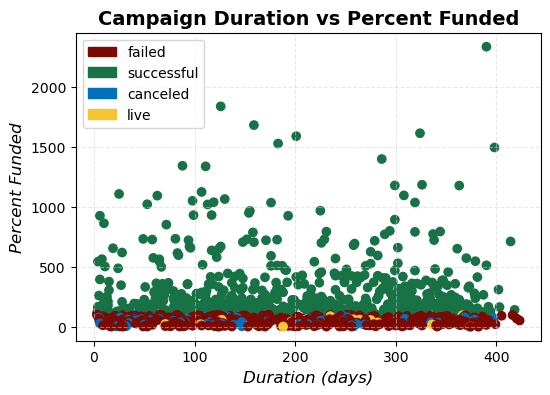

In [38]:
# Graph 1: Campaign Duration vs Percent Funded

x = duration_df.duration
y = duration_df.percent_funded
colors = {"failed": "#7C0902",
          "successful": "#177245",
          "canceled": "#0070BB",
          "live": "#F4C431"}
df2["color"] = duration_df.outcome.map(colors)

plt.figure(figsize=(6, 4))
plt.scatter(x, y, color=df2.color)
legend_info = [mpatches.Patch(color=color, label=outcome) for outcome, color in colors.items()]

plt.xlabel("Duration (days)", fontsize=12, fontstyle="italic")
plt.ylabel("Percent Funded", fontsize=12, fontstyle="italic")
plt.title("Campaign Duration vs Percent Funded", fontweight="bold", fontsize=14)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
plt.legend(handles=legend_info)
plt.savefig("Duration_vs_percent_funded_all.png")
plt.show()

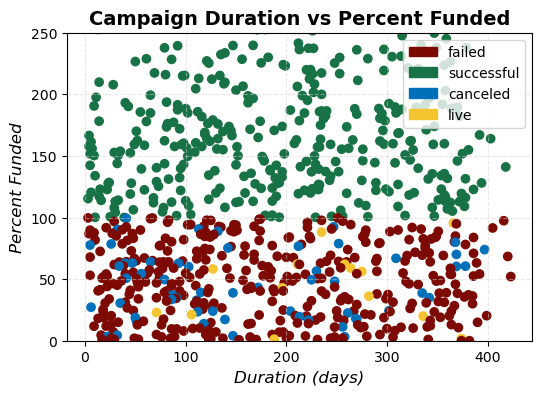

In [39]:
# Graph 2: Campaign Duration vs Percent Funded - zoom in

x = duration_df.duration
y = duration_df.percent_funded
colors = {"failed": "#7C0902",
          "successful": "#177245",
          "canceled": "#0070BB",
          "live": "#F4C431"}
df2["color"] = duration_df.outcome.map(colors)

plt.figure(figsize=(6, 4))
plt.scatter(x, y, color=df2.color)
legend_info = [mpatches.Patch(color=color, label=outcome) for outcome, color in colors.items()]
plt.ylim(0, 250)

plt.xlabel("Duration (days)", fontsize=12, fontstyle="italic")
plt.ylabel("Percent Funded", fontsize=12, fontstyle="italic")
plt.title("Campaign Duration vs Percent Funded", fontweight="bold", fontsize=14)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
plt.legend(handles=legend_info)
plt.savefig("Duration_vs_percent_funded_zoom.png")
plt.show()